# Rozhodovací stromy: učení se z dat
  
  * V tomto notebooku byste se měli naučit, jak vytvořit (naučit) model dat ve formě rozhodovacího stromu.
  * Ukážeme si typický způsob, jak se toto dělá a představíme si i základní API knihovny `sklearn`.
  * Začneme s daty a skončíme s naučeným modelem, o kterém budeme tušit, jak je dobrý.

In [2]:
import math
import pandas as pd
import numpy as np

## Data: základní přehled

  * Použijeme balíček `pandas` k nahrání dat a jejich základnímu prozkoumání.
  * Data jsme stáhli ze serveru **kaggle.com**, kde můžete také najít [popis jednotlivých příznaků](https://www.kaggle.com/uciml/adult-census-income).

In [3]:
data = pd.read_csv('adult-census.csv', )
display(data.shape)
display(data.head())
display(data.info())
display(data.describe())
display(data.nunique()) # počet unikátních hodnot, defaultně ignoruje NaNs

(32561, 15)

age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States  <=50K  
2          4356              40  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


None

age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours.per.week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

age                  73
workclass             9
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [4]:
data

age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                      ?  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                      ?      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

### Chybějící hodnoty

  * Některé příznaky jsou očividně nevyplněné, ale `pandas` hlásí, že žádné nechybí. Je to tím, že chybějící hodnoty nejsou zakódované jako `NaN` ale jsou nahrazeny otazníkem `?`.

In [5]:
data = data.replace('?', np.nan)
# podívejme se na výsledek
data.info()
data.isnull().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [6]:
data

age workclass  fnlwgt     education  education.num      marital.status  \
0       90       NaN   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66       NaN  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex  capital.gain  \
0                    NaN  Not-in-family  White  Female             0   
1        Exec-managerial  Not-in-family  White  Female             0   
2                    NaN      Unmarried  Black  Female             0   
3      Machine-op-inspct      Unmarried  White  Female             0   
4         Prof-specialty      Own-child  White  Female             0   
...                  ...            ...    ...     ...           ...   
32556    Protective-serv  Not-in-family  White    Male             0   
32557       Tech-support           Wife  White  Female             0   
32558  Machine-op-inspct        Husband  White    Male             0   
32559       Adm-clerical      Unmarried  White  Female             0   
32560       Adm-clerical      Own-child  White    Male             0   

       capital.loss  hours.per.week native.country income  
0              4356              40  United-States  <=50K  
1              4356              18  United-States  <=50K  
2              4356              40  United-States  <=50K  
3              3900              40  United-States  <=50K  
4              3900              40  United-States  <=50K  
...             ...             ...            ...    ...  
32556             0              40  United-States  <=50K  
32557             0              38  United-States  <=50K  
32558             0              40  United-States   >50K  
32559             0              40  United-States  <=50K  
32560             0              20  United-States  <=50K  

[32561 rows x 15 columns]

## První pokus o použití rozhodovacího stromu implementovaného v `sklearn`

    

 * [Zde](http://scikit-learn.org/stable/modules/tree.html) najdete dokumentaci k rozhodovacím stromům v balíčku `tree` knihovny `scikit-learn`.
 * Naším cílem je pouze zjistit, jestli už máme data připravená k tomu, aby si s nimi tato implementace poradila.

In [7]:
!pip install scikit-learn

In [8]:
from sklearn.tree import DecisionTreeClassifier
# uložíme si vysvětlovanou proměnnou (poslední sloupec income) a příznaky
Xdata = data.iloc[:,:-1]
ydata = data.iloc[:,-1] 

  * V knihovně `scikit-learn` mají modely jednotný interface (API).
  * Nejdříve se vždy nastaví hyperparametry modelu (jaké jsou k dispozici lze zjistit pomocí nápovědy) a "nastavený" model se uloží do proměnné:

In [9]:
dt = DecisionTreeClassifier()
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

  * Model se pak "naučí" na datech pomocí metody `.fit()`. 
  * V případě supervizovaných modelů vyžaduje většinou matici (`pandas.DataFrame`) s příznaky a vektor (`pandas.Series`) s vysvětlovanou proměnnou.

In [10]:
dt.fit(Xdata, ydata)

ValueError: could not convert string to float: 'Private'

  * **Ajajaj, nefunguje to:** implementace rozhodovacího stromu v `sklearn` si neumí poradit s nečíselnými (nenumerickými) příznaky.
  * Musíme proto nahradit stringy nějakými jejich kódy.
  * **ÚKOL:** Zjistěte, jaký je vztah mezi příznaky *education* a *education.num*. 

In [11]:
# Zjistíme kolik unikátních párů (education, education.num) existuje
data.groupby(['education', 'education.num']).size().reset_index()

education  education.num      0
0           10th              6    933
1           11th              7   1175
2           12th              8    433
3        1st-4th              2    168
4        5th-6th              3    333
5        7th-8th              4    646
6            9th              5    514
7     Assoc-acdm             12   1067
8      Assoc-voc             11   1382
9      Bachelors             13   5355
10     Doctorate             16    413
11       HS-grad              9  10501
12       Masters             14   1723
13     Preschool              1     51
14   Prof-school             15    576
15  Some-college             10   7291

In [13]:
# Jak je vidět v předešlé buňce, education a education.num je v poměru 1:1. 'Education.num' nám navíc oproti 'education' informaci o pořadí vzdělání.
# Implementace rozhodovacích stromů v scikit-learn stejně neumí pracovat s řetězci, čili sloupec 'education' bychom stejně museli převést na kódy a ty by už nemusely být seřazené.
# Je tedy lepší použít stávající 'education.num' a zahodit 'education'.
# Nastavení 'errors' na 'ignore' nám umožňuje spuštět buňku vícekrát a zachovává stejný efekt, tedy že dále nebude dataframe 'data' obsahovat sloupec 'education'
data.drop(labels=['education'], axis=1, inplace=True, errors='ignore')

  * Všechny příznaky s hodnotami typu string nejsou spojité, ale tzv. **kategorické** (diskrétní).
  * Můžeme je tedy všechny nahradit číselnými kódy.
  * Je v `pandas` nějaká metoda, která to umí? Samozřejmě ano. Je ale nutné typ příznaku v `pandas` změnit na `category`.

In [14]:
string_cols = data.select_dtypes(['object']).columns
print(string_cols)
data[string_cols].nunique()
data[string_cols] = data[string_cols].astype('category').apply(lambda x: x.cat.codes)
data.info()
# funguje to?
data["native.country"].unique()

Index(['workclass', 'marital.status', 'occupation', 'relationship', 'race',
       'sex', 'native.country', 'income'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int8 
 2   fnlwgt          32561 non-null  int64
 3   education.num   32561 non-null  int64
 4   marital.status  32561 non-null  int8 
 5   occupation      32561 non-null  int8 
 6   relationship    32561 non-null  int8 
 7   race            32561 non-null  int8 
 8   sex             32561 non-null  int8 
 9   capital.gain    32561 non-null  int64
 10  capital.loss    32561 non-null  int64
 11  hours.per.week  32561 non-null  int64
 12  native.country  32561 non-null  int8 
 13  income          32561 non-null  int8 
dtypes: int64(6), int8(8)
memory usage: 1.7 MB


array([38, -1, 25, 11, 39,  2, 35, 18, 29, 37,  1, 34, 14, 32, 30, 19,  8,
       10, 21, 23, 16, 15,  4, 20,  0, 28, 26,  5, 13,  7, 17,  3, 12, 22,
        6,  9, 40, 33, 31, 24, 36, 27], dtype=int8)

  * A teď to můžeme zkusit s `DecisionTreeClassifier` znovu!
  * Co se stalo s `NaN` položkami?

In [15]:
data.occupation.unique()
data.groupby(["occupation"]).size() # ve sloupci occupation bylo 1843 chybějících hodnot

occupation
-1     1843
 0     3770
 1        9
 2     4099
 3     4066
 4      994
 5     1370
 6     2002
 7     3295
 8      149
 9     4140
 10     649
 11    3650
 12     928
 13    1597
dtype: int64

**Chybějící hodnoty byly nahrazeny -1!**

Jak se vypořádat s chybějícími hodnotami je docela věda. Jejich nahrazení jedinou unikátní hodnotou je takový nejjednodušší (a skutečně používaný) způsob.

## Druhý pokus o použití rozhodovacího stromu

In [16]:
dt = DecisionTreeClassifier()
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [17]:
Xdata = data.iloc[:,:-1]
ydata = data.iloc[:,-1]

# pro případ, kdy vysvětlována proměnná není v posledním sloupci
Xdata2 = data.drop(columns='income')
ydata2 = data['income']

In [18]:
# porovnání výsledků iloc a drop
print(Xdata.equals(Xdata2))
print(ydata.equals(ydata2))

True
True


In [19]:
dt.fit(Xdata, ydata)

DecisionTreeClassifier()

## Učení stromu

  * Cílem je vytvořit rozhodovací strom, který bude předpovídat *income* daných osob.
  * Chceme také najít nejlepší hodnoty parametrů `max_depth` a `criterion` metody `DecisionTreeClassifier`. Takovýmto parametrům metody se říká *hyperparametery*.
  * Jak víme z přednášky, správný způsob ladění hyperparametrů vyžaduje rozdělení dat na trénovací, validační a testovací.
  * A samozřejmě v `sklearn` je na to balíček.

In [20]:
rd_seed = 333 # data jsou rozdělována náhodně, v rámci testování je ale dobré mít pevně daný random seed
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.25, random_state=rd_seed) 
print("původní data")
display(Xdata.shape)
display(ydata.shape)
print("trénovací data")
display(Xtrain.shape)
display(ytrain.shape)
print("testovací data")
display(Xtest.shape)
display(ytest.shape)

původní data


(32561, 13)

(32561,)

trénovací data


(24420, 13)

(24420,)

testovací data


(8141, 13)

(8141,)

In [21]:
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain, ytrain, test_size=0.25, random_state=rd_seed) 
print('nové trénovací data')
display(Xtrain.shape)
display(ytrain.shape)
print('validační data')
display(Xval.shape)
display(yval.shape)

nové trénovací data


(18315, 13)

(18315,)

validační data


(6105, 13)

(6105,)

### Měření trénovací chyby pomocí klasifikační přesnosti

In [22]:
dt = DecisionTreeClassifier(max_depth=50)
dt.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=50)

  * Rozhodovací strom máme hotový, nyní můžeme použít metodu `predict()`, abychom získali predikce, které dává strom pro trénovací data.

In [23]:
ypredicted = dt.predict(Xtrain)
ypredicted

array([0, 0, 0, ..., 0, 0, 1], dtype=int8)

In [24]:
(ytrain - ypredicted).value_counts(normalize=True)

0    0.999945
1    0.000055
Name: income, dtype: float64

  * Přesnost na trénovacích datech je  (pro `max_depth` = 50) skoro 100 %! 
  * Měřit přesnost a různé metriky nemusíme takto ručně, v `sklearn` je na to samozřejmě balíček:

In [25]:
import sklearn.metrics as metrics
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt.predict(Xtrain))))

accuracy score (train): 0.999945


S testovacími daty to tak skvěle nedopadne:

In [26]:
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))

accuracy score (test): 0.814396


### Ladění hyperparameterů `max_depth` a `criterion`

  * Začněme s hyperparametrem `max_depth`.
  * Jak víme, budeme používat validační množinu.
  * Prozkoumáme hodnoty od 1 do 100.

In [27]:
%%time
val_acc = []
train_acc = []
depths = range(1,101)
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, dt.predict(Xval)))

CPU times: user 6.84 s, sys: 0 ns, total: 6.84 s
Wall time: 6.85 s


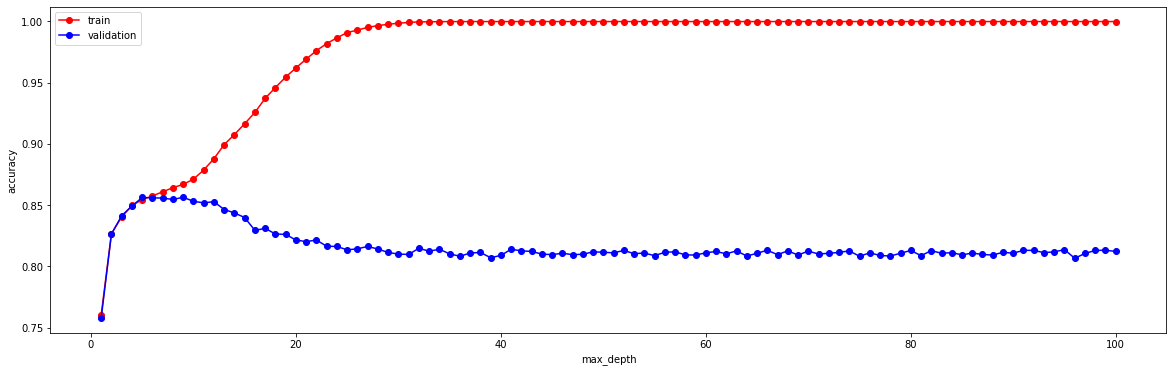

In [28]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,6))
plt.plot(depths, train_acc,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(depths, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [29]:
optimal_depth = np.argmax(val_acc) + 1
optimal_depth

9

Spočítejme **testovací accuracy** pro nejlepší nalezenou hodnotu `max_depth`:

In [30]:
dt = DecisionTreeClassifier(max_depth=optimal_depth)
dt.fit(Xtrain, ytrain)
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))

accuracy score (test): 0.852598


### Grid search: ladění více hyperparameterů

  * Chceme projít hodnoty `max_depth` z intervalu [1, 30] a obě možné hodnoty `criterion`, tj. 60 různých kombinací.
  * Můžeme samozřejmě použít dva vnořené for cykly (což je hrozné) nebo použít `ParameterGrid` balíček.

In [32]:
from sklearn.model_selection import ParameterGrid
param_grid = {
    'max_depth': range(1,31), 
    'criterion': ['entropy', 'gini']
}
param_comb = ParameterGrid(param_grid)
# pro lepší pochopení:
[param_comb[i] for i in range(6)]

[{'max_depth': 1, 'criterion': 'entropy'},
 {'max_depth': 2, 'criterion': 'entropy'},
 {'max_depth': 3, 'criterion': 'entropy'},
 {'max_depth': 4, 'criterion': 'entropy'},
 {'max_depth': 5, 'criterion': 'entropy'},
 {'max_depth': 6, 'criterion': 'entropy'}]

In [33]:
%%time
val_acc = []
train_acc = []
for params in param_comb:
    dt = DecisionTreeClassifier(max_depth=params['max_depth'], criterion=params['criterion'])
    dt.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, dt.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, dt.predict(Xval)))

CPU times: user 3.6 s, sys: 2 ms, total: 3.6 s
Wall time: 3.6 s


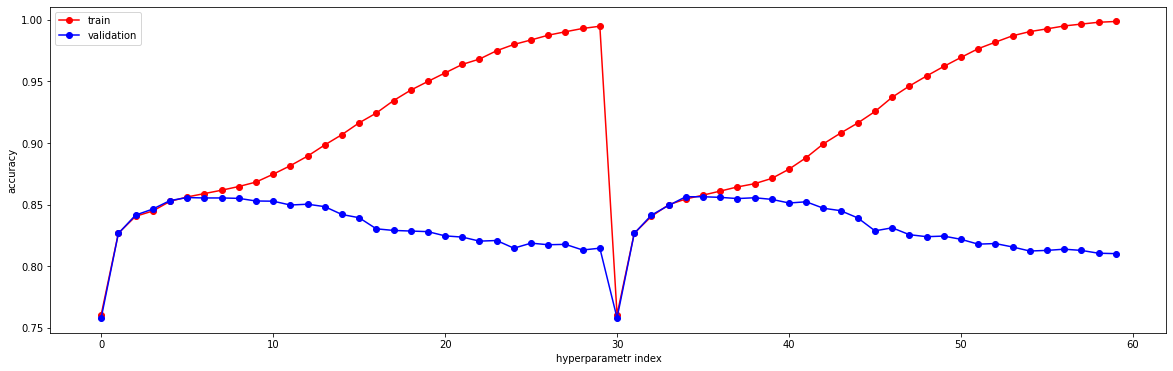

In [34]:
plt.figure(figsize=(20,6))
plt.plot(train_acc,'or-')
plt.plot(val_acc,'ob-')
plt.xlabel('hyperparametr index')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [35]:
best_params = param_comb[np.argmax(val_acc)]
print(best_params)
print(val_acc[np.argmax(val_acc)])
print(train_acc[np.argmax(val_acc)])

{'max_depth': 5, 'criterion': 'gini'}
0.8563472563472564
0.8545454545454545


In [36]:
dt = DecisionTreeClassifier(**best_params) # TOHOTO ŘÁDKU si všimněte: dvě hvězdišky jsou mocný nástroj
dt.fit(Xtrain, ytrain)
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, dt.predict(Xtrain))))
print('accuracy score (validation): {0:.6f}'.format(metrics.accuracy_score(yval, dt.predict(Xval))))
print('accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, dt.predict(Xtest))))

accuracy score (train): 0.854545
accuracy score (validation): 0.856183
accuracy score (test): 0.851861


In [38]:
# ukázka operátoru **
def add(a=0, b=0):
    print(a + b)

d = {
    'a': 1,
    'b': -2
}

add(**d)

-1


### ÚKOL: naučte strom na datech k Titaniku z minulého cvičení

  * Hyperparametry k tunění si vyberte sami.
  * Rozdělte data ve stejných poměrech a se stejným `random_state` v metode `train_test_split()` jeko výše.

In [39]:
titanic = pd.read_csv('titanic.csv', sep=';')
### sem přijde Váš kód

# Jak vykreslit strom  

In [40]:
simple_data = pd.read_csv('simple_data.csv', sep=';') # data z přednášky
display(simple_data.head(16)) 
dts = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dts.fit(simple_data.iloc[:,1:],simple_data['T'])

T  F1  F2  F3
0  1   1   0   0
1  1   0   1   1
2  1   1   0   0
3  1   1   1   1
4  0   0   0   1
5  0   0   1   0
6  0   0   0   1
7  0   1   1   0

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(248.0, 475.65000000000003, 'F1 <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]\nclass = y[0]'),
 Text(124.0, 339.75, 'F2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = y[0]'),
 Text(62.0, 203.85000000000002, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = y[0]'),
 Text(186.0, 203.85000000000002, 'F3 <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = y[0]'),
 Text(124.0, 67.94999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = y[0]'),
 Text(248.0, 67.94999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = y[1]'),
 Text(372.0, 339.75, 'F2 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = y[1]'),
 Text(310.0, 203.85000000000002, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = y[1]'),
 Text(434.0, 203.85000000000002, 'F3 <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = y[0]'),
 Text(372.0, 67.94999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = y[0]'),
 Text(496.0, 67.9499999999999

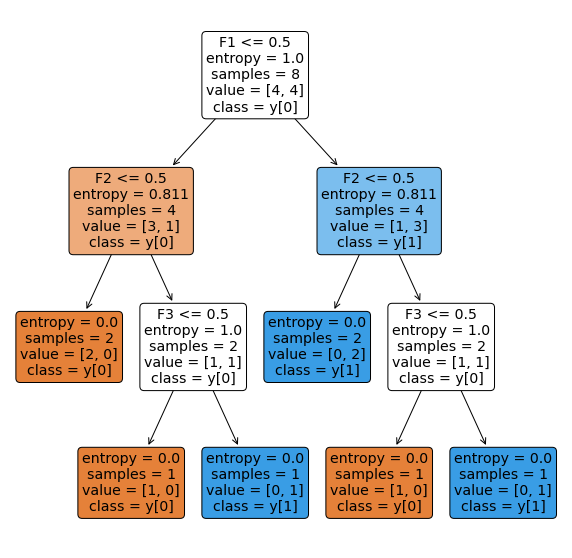

In [41]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(10,10))
plot_tree(dts, filled=True, feature_names=simple_data.iloc[:,1:].columns, class_names=True, rounded=True)


# pro titanik
#plt.figure(figsize=(20,25))
#plot_tree(dt, filled=True, feature_names=Xdata.columns, class_names=["not survived", "survived"], rounded=True)